In the following notebook we're going to apply DBSCAN to the [San Francisco Crime Classification Dataset](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv) in order to create clusters out of the reported crimes, subsequently using the library folium we'll visualize the different crimes directly on the map. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "whitegrid")

import folium
from sklearn.cluster import DBSCAN

file_path ='C:\\Users\\Orr\\Documents\\DataScience_2020\\Neoland\\GITHUB_projects\\project\\2.Clustering\\DBSCAN\\data'

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
# df.to_csv(file_path + "\\sanfrancisco_crimes.csv")
df.columns = df.columns.str.lower()
print(df.shape)

(150500, 13)


In [3]:
df.head()

,incidntnum,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,pdid
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Let's start by quickly checking for null values and look for the variables useful for the goal

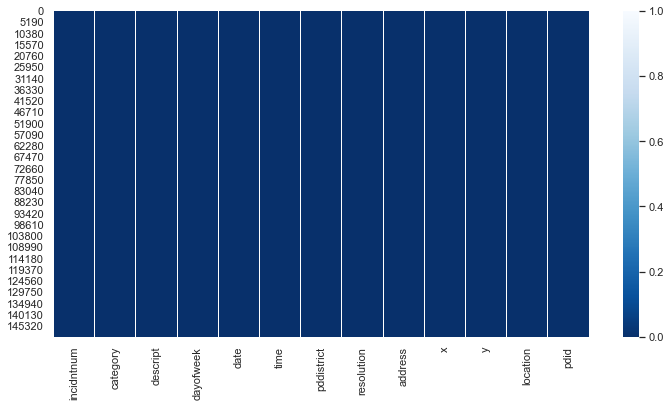

In [4]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap = "Blues_r")
plt.show()

In [5]:
print("CRIMES CATEGORIES: ", end = "\n\n")
print(df["category"].value_counts()[:10], end = "\n"+5*"*****"+"\n" + "PDDISTRICTS VALUES: " + "\n\n")
print(df["pddistrict"].value_counts()[:10])

CRIMES CATEGORIES: 

LARCENY/THEFT     40409
OTHER OFFENSES    19599
NON-CRIMINAL      17866
ASSAULT           13577
VANDALISM          8589
VEHICLE THEFT      6419
WARRANTS           5914
BURGLARY           5802
SUSPICIOUS OCC     5782
MISSING PERSON     4338
Name: category, dtype: int64
*************************
PDDISTRICTS VALUES: 

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: pddistrict, dtype: int64


To simplify the management of the data we'll limit the content of the actual dataset, creeating a new, smaller dataframe limited to few areas.

In [6]:
df1 = df.copy()
#filtered df
df = df[(df["category"] == "VEHICLE THEFT")&(df["pddistrict"].isin(["SOUTHERN", "NORTHERN", "TENDERLOIN"]))]
print(df.shape)
df.head()

(1505, 13)


,incidntnum,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,pdid
52,160010890,VEHICLE THEFT,STOLEN TRUCK,Tuesday,01/05/2016 12:00:00 AM,05:25,NORTHERN,NONE,HAYES ST / POLK ST,-122.418045,37.777512,"(37.7775118895695, -122.418045452768)",16001089007025
115,150480366,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Thursday,12/08/2016 12:00:00 AM,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",15048036607020
318,160029998,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,01/10/2016 12:00:00 AM,23:55,TENDERLOIN,NONE,HYDE ST / TURK ST,-122.415695,37.782585,"(37.7825851968467, -122.415694922134)",16002999807021
354,160034408,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Wednesday,01/13/2016 12:00:00 AM,09:00,SOUTHERN,"ARREST, BOOKED",1200 Block of MISSION ST,-122.413583,37.777044,"(37.7770436202636, -122.413583483648)",16003440807020
401,160034301,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,01/12/2016 12:00:00 AM,08:30,NORTHERN,NONE,VALLEJO ST / LAGUNA ST,-122.430185,37.795853,"(37.7958526962698, -122.430185001617)",16003430107021


The columns X and Y are the coordinates of the reported crime, hence by plotting these values we can recreate the interested area. 

C:\Users\Orr\anaconda3\envs\ENVIRONMENT\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


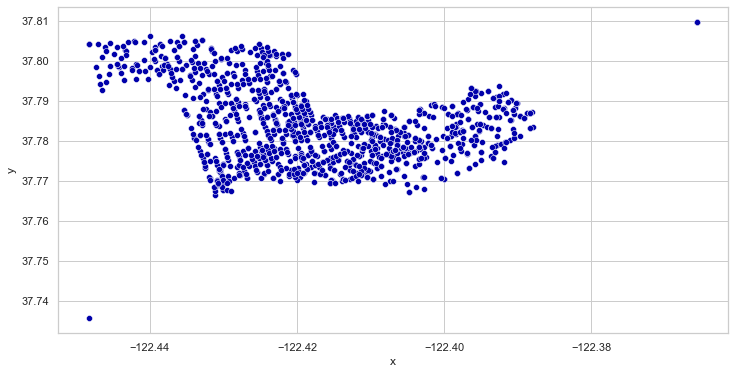

In [7]:
#coordinates only
df2 = df.iloc[:, 9:11]

fig = plt.figure(figsize = (12,6))
sns.scatterplot(df2["x"], df2["y"], color = "#00a")
plt.show()

Now using DBSCAN we can look for different clusters. First of all though, we need to identify a correct epsilon to use as parameter. Nearest Neighbors from sklearn helps in this process calculating the distance between points

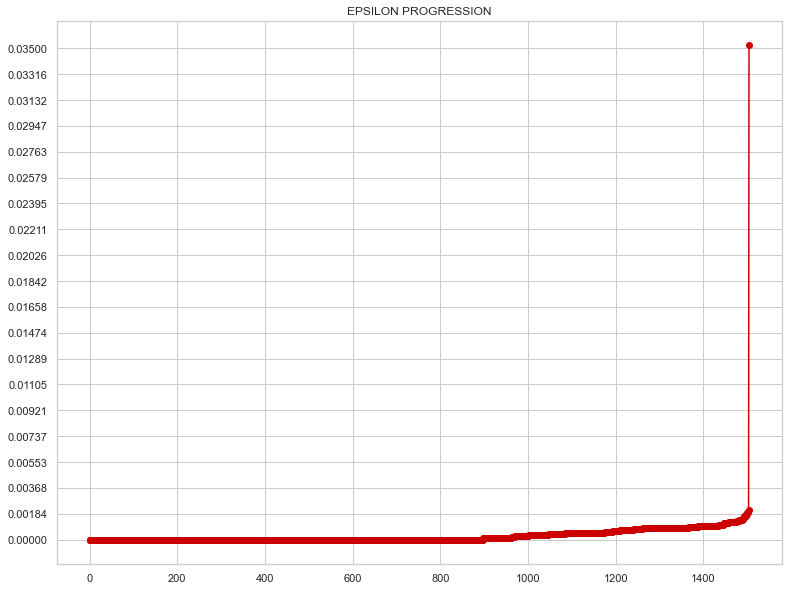

In [8]:
from sklearn.neighbors import NearestNeighbors

N = NearestNeighbors(n_neighbors = 2).fit(df2.values)
distances, indeces = N.kneighbors(df2.values)
distances = np.sort(distances, axis = 0)

plt.figure(figsize = (13, 10))
plt.title("EPSILON PROGRESSION")
plt.plot(distances[:,1], color = "#c00", marker = "o")
plt.yticks(np.linspace(0.000, 0.035, 20))
plt.show()

In [9]:
db = DBSCAN(eps = 0.0018, min_samples = 18).fit(df2[["x","y"]].values)
labels = db.labels_

DBSCAN discovered ten clusters (0 to 10) and grouped in the -1 cluster all the outliers, let's visualize what we obtained for a better understanding

In [10]:
df["class"] = labels
df2["class"] = labels

df3 = df2.copy()
df=df[df["class"]!= -1]

C:\Users\Orr\anaconda3\envs\ENVIRONMENT\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Orr\anaconda3\envs\ENVIRONMENT\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


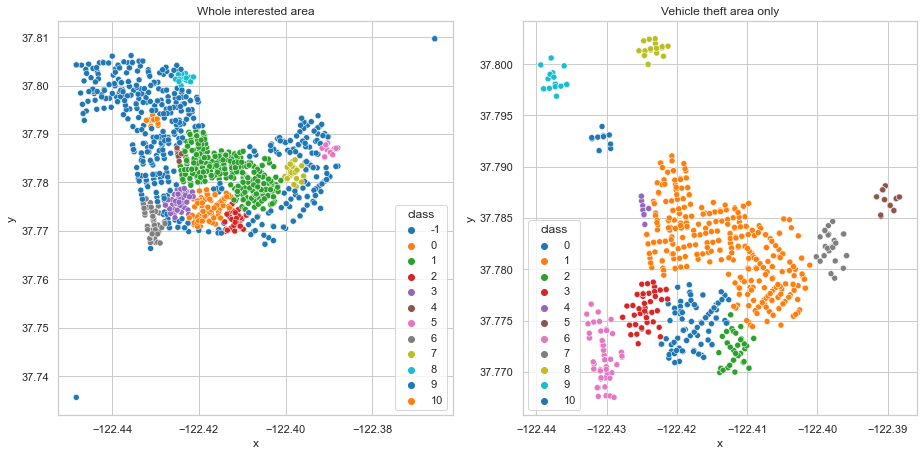

In [11]:
fig,ax = plt.subplots(1,2, figsize=(13, 6.5))
ax[0].set_title("Whole interested area")
sns.scatterplot(df2["x"], df2["y"], hue = df2["class"], palette = "tab10", ax=ax[0])
ax[1].set_title("Vehicle theft area only")
sns.scatterplot(df["x"], df["y"], hue =df["class"], palette = "tab10", ax = ax[1])
fig.tight_layout()
plt.show()

We can now create new dataframe with the new data

In [12]:
df["class"].value_counts()[:7]

1    516
0    107
6     70
3     57
7     48
2     46
9     26
Name: class, dtype: int64

In [13]:
df = df[df["class"].isin(df["class"].value_counts().index[:7])]
df["class"].unique()

array([0, 1, 2, 3, 6, 7, 9], dtype=int64)

In [14]:
df["class"] =df["class"].replace({7:5, 9:4})

The library folium allow to visualize the data we've collected on the real area of San Francisco's map.

We start by collecting the coordinates of the area we'd like to visualize and create a folium.Map with initial zoom of 15. To represent the crimes on the map, we need to create a new layer containing these informations using FeatureGroup().

In [32]:
latitude = 37.77
longitude = -122.42

#reduce the map for better management
sf_map = folium.Map(location = [latitude, longitude], zoom_start=15, height = 500, width = 500)
accidents = folium.map.FeatureGroup()

Now we create a list of colors, one per each category discovered by DBSCAN and in a for loop we iterate every crime and add its coordinates to the accidents layer. 

In [33]:
colors = ["red","blue","green","cyan","magenta","yellow","pink","gray"]

for lat, lng, col in zip(df["y"], df["x"], df["class"]):
    accidents.add_child(
    folium.CircleMarker([lat, lng], radius = 5, color = colors[col], fill = True, fill_color = "b", fill_opacity = .6))
    

In [43]:
folium.TileLayer('openstreetmap').add_to(sf_map)
sf_map.add_child(accidents)